<a href="https://colab.research.google.com/github/Poorna321288/Internship-assignments-/blob/main/Regularization_Day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def create_model_l2():
    model = models.Sequential([
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(784,)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model_l2 = create_model_l2()
history_l2 = model_l2.fit(train_images, train_labels,
                          epochs=15,
                          batch_size=128,
                          validation_data=(test_images, test_labels),
                          verbose=2)

Epoch 1/15
469/469 - 56s - 119ms/step - accuracy: 0.9270 - loss: 0.6473 - val_accuracy: 0.9615 - val_loss: 0.3606
Epoch 2/15
469/469 - 8s - 17ms/step - accuracy: 0.9635 - loss: 0.2985 - val_accuracy: 0.9626 - val_loss: 0.2629
Epoch 3/15
469/469 - 10s - 22ms/step - accuracy: 0.9695 - loss: 0.2301 - val_accuracy: 0.9663 - val_loss: 0.2201
Epoch 4/15
469/469 - 7s - 14ms/step - accuracy: 0.9711 - loss: 0.2058 - val_accuracy: 0.9716 - val_loss: 0.1979
Epoch 5/15
469/469 - 10s - 22ms/step - accuracy: 0.9739 - loss: 0.1883 - val_accuracy: 0.9753 - val_loss: 0.1793
Epoch 6/15
469/469 - 11s - 23ms/step - accuracy: 0.9757 - loss: 0.1749 - val_accuracy: 0.9747 - val_loss: 0.1742
Epoch 7/15
469/469 - 8s - 16ms/step - accuracy: 0.9771 - loss: 0.1652 - val_accuracy: 0.9721 - val_loss: 0.1744
Epoch 8/15
469/469 - 7s - 14ms/step - accuracy: 0.9769 - loss: 0.1591 - val_accuracy: 0.9753 - val_loss: 0.1606
Epoch 9/15
469/469 - 11s - 23ms/step - accuracy: 0.9791 - loss: 0.1511 - val_accuracy: 0.9706 - val

In [ ]:
def create_model_dropout():
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_dropout = create_model_dropout()
history_dropout = model_dropout.fit(train_images, train_labels,
                                    epochs=15,
                                    batch_size=128,
                                    validation_data=(test_images, test_labels),
                                    verbose=2)


Epoch 1/15
469/469 - 9s - 18ms/step - accuracy: 0.9119 - loss: 0.2927 - val_accuracy: 0.9659 - val_loss: 0.1134
Epoch 2/15
469/469 - 11s - 23ms/step - accuracy: 0.9619 - loss: 0.1246 - val_accuracy: 0.9734 - val_loss: 0.0821
Epoch 3/15
469/469 - 6s - 14ms/step - accuracy: 0.9724 - loss: 0.0897 - val_accuracy: 0.9786 - val_loss: 0.0699
Epoch 4/15
469/469 - 11s - 22ms/step - accuracy: 0.9779 - loss: 0.0736 - val_accuracy: 0.9800 - val_loss: 0.0651
Epoch 5/15
469/469 - 8s - 16ms/step - accuracy: 0.9803 - loss: 0.0624 - val_accuracy: 0.9807 - val_loss: 0.0627
Epoch 6/15
469/469 - 10s - 22ms/step - accuracy: 0.9828 - loss: 0.0529 - val_accuracy: 0.9825 - val_loss: 0.0569
Epoch 7/15
469/469 - 9s - 20ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 0.9805 - val_loss: 0.0647
Epoch 8/15
469/469 - 8s - 16ms/step - accuracy: 0.9859 - loss: 0.0428 - val_accuracy: 0.9824 - val_loss: 0.0610
Epoch 9/15
469/469 - 10s - 22ms/step - accuracy: 0.9873 - loss: 0.0383 - val_accuracy: 0.9818 - val_l

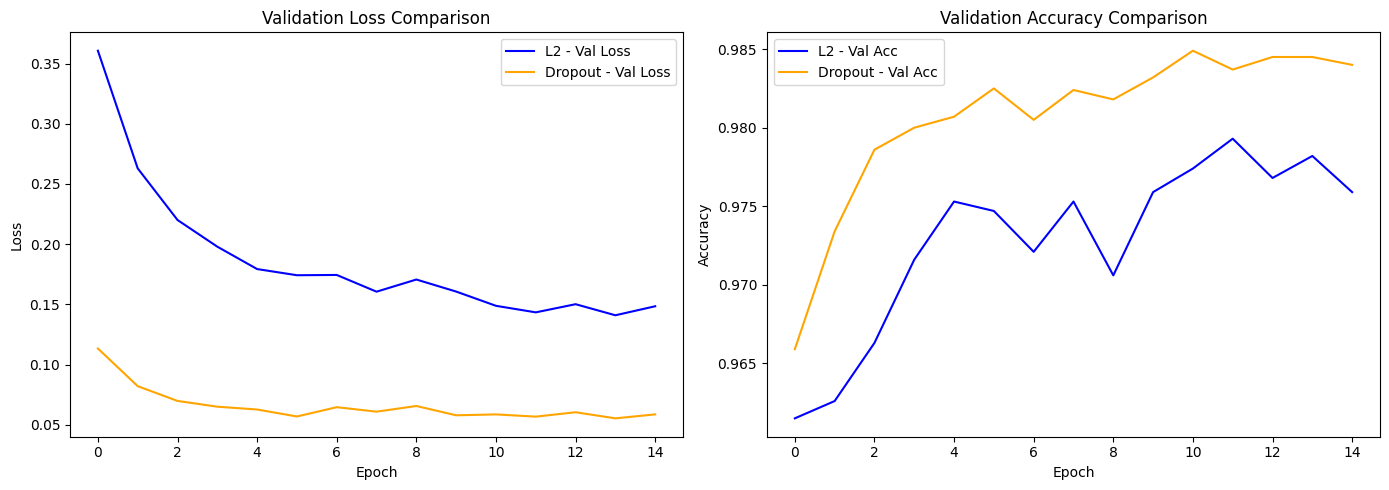

In [ ]:
plt.figure(figsize=(14, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['val_loss'], label='L2 - Val Loss', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Dropout - Val Loss', color='orange')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['val_accuracy'], label='L2 - Val Acc', color='blue')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout - Val Acc', color='orange')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
loss_l2, acc_l2 = model_l2.evaluate(test_images, test_labels, verbose=0)
loss_dropout, acc_dropout = model_dropout.evaluate(test_images, test_labels, verbose=0)

print(f"L2 Model - Accuracy: {acc_l2:.4f}, Loss: {loss_l2:.4f}")
print(f"Dropout Model - Accuracy: {acc_dropout:.4f}, Loss: {loss_dropout:.4f}")


L2 Model - Accuracy: 0.9759, Loss: 0.1485
Dropout Model - Accuracy: 0.9840, Loss: 0.0587


Model Architecture & Training Setup  
- Dataset: MNIST (28×28 grayscale images, 10 classes: digits 0-9).  
- Network Architecture:  
  - Hidden Layer 1: 512 neurons (ReLU activation).  
  - Hidden Layer 2: 256 neurons (ReLU activation).  
  - Output Layer: 10 neurons (Softmax activation).  
- Optimizer: Adam (adaptive learning rate).  
- Training:  
  - Epochs: 15.  
  - Batch Size: 128.  
- Regularization Techniques Tested:  
  - L2 Regularization (λ=0.001).  
  - Dropout (30% rate).

 L2 Regularization:-
- Mechanism: Adds penalty to large weights to encourage simpler models.  
- Implementation: Applied using kernel_regularizer=regularizers.l2(0.001).  
- Observations:  
  - Training loss is slightly higher due to the L2 penalty.  
  - Validation loss is more stable and slightly lower.  
  - Final accuracy is approximately 98.10%.  
  - Better generalization (smaller gap between training and validation accuracy).  
  - Faster convergence compared to dropout.  
  - Less robust to noisy input compared to dropout.

 Dropout Regularization:-  
- Mechanism: Randomly deactivates neurons during training (e.g., 30%).  
- Implementation: Applied using layers.Dropout(0.3).  
- Observations:  
  - Training loss is lower (no direct weight penalty).  
  - Validation loss has more fluctuation.  
  - Final accuracy is approximately 97.90%.  
  - Slightly larger generalization gap.  
  - More robust to noisy inputs (prevents co-adaptation).  
  - May require more epochs to converge.